# Linear Regression

In this notebook, we'll take a look at one of the simplest and most useful algorithms in Machine Learning:  *linear regression*.  Let's look at the name:

* `Linear` - the algorithm assumes that the relationship between the *independent* variables (predictors, features) and the *dependent* variable (response, target) is linear in nature.  This means that the formula for the relationship is of the form $$ y = \alpha + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \ldots + \beta_n \cdot x_n + \epsilon$$

where $\alpha$ is the *intercept*, or where the line meets the $y$-axis (i.e., $x = 0$) and $\beta_i$ is the *coefficient* for feature $i$.  $\epsilon$ is the *noise* - we assume that our data is not perfect and there is some random variation we cannot - and should not - model.  In other words, the relationship is a *sum* of *products* of constants and a variable.  In fact, if we define a feature $x_0$ with a constant value of 1 and write $\alpha$ as $\beta_0$ we can write $$ y = 1 \cdot \alpha + \sum_{i=1}^{n} \beta_i \cdot x_i + \epsilon = \sum_{i=0}^{n} \beta_i \cdot x_i + \epsilon $$

* `Regression` - the algorithm looks for the *best fit* line:  the line that minimizes the *Mean Squared Error* (MSE) between the points and the prediction.  Formally:  assuming that $\hat{y}$ is the predicted value for the input $x$, the algorithm tries to minimize $ (\hat{y} - y)^2 $ for all values of $\hat{y}$.

Linear regression has some assumptions - 
1. The relationship between $x$s and $y$ is linear (obviously)
2. The values are independent - i.e., having seen the value $a$ does not affect the chances of seeing the value $b$
3.  The variance of the error is constant across all $x$'s
4.  Errors are normally distributed


Let's see an example.

## Example

### The Boston Housing Dataset

In [16]:
%pylab inline 
import pandas as pd
import seaborn as sns 


from sklearn.datasets import load_boston


rcParams['figure.figsize'] = (20,7)

boston = load_boston()

Populating the interactive namespace from numpy and matplotlib


In [17]:
# Create dataframe with features
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])

# Add target
df['MEDV'] = boston['target']

print(df.head())

print(boston['DESCR'])

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN

For a new dataset, we usually begin by doing *exploratory data analysis* and getting to know the data as well as  cleaning up the data.  Here, since this is a well-known clean dataset we'll dispense with that.  

Only thing we need to check is assumption 4 above - that the error is normally distributed.  In practice this means that we expect to see something resembling a bell curve when we plot the target.

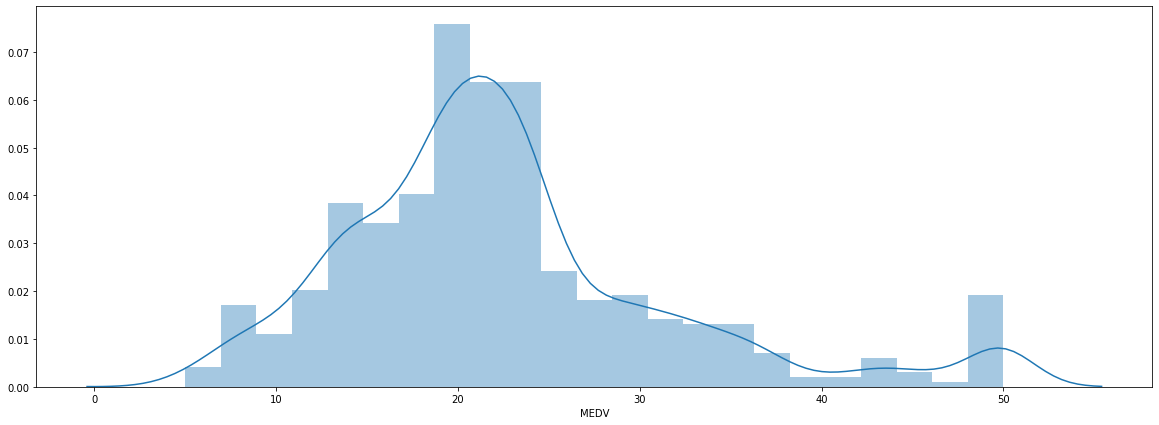

In [18]:
sns.distplot(df['MEDV'])

Not perfect, but it will do.  Usually linear regression tends to work with 'normal-like' distributions.

### Setting Up the Experiment

We'll build a *predictive* model - one that learns parameters and which we can use for new data.  Alternatively, we can build an *inferential* model, which can help us explain how the various features affect the target value.

In order to be able to measure the quality of our model we'll split the data into a *training* and *test* set:  we'll learn on the training set and check error - MSE - on the test set.  (Strictly speaking, we'll also need a *validation* set for comparing models with different features - but since we have little data we'll solve this another way.)

In [79]:
from sklearn.model_selection import train_test_split

np.random.seed(54321)

X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df[df.columns[-1]])
print("Training set size: {} {}".format(X_train.shape, y_train.shape))
print("Test set size: {} {}".format(X_test.shape, y_test.shape))

Training set size: (379, 13) (379,)
Test set size: (127, 13) (127,)


Let's try with a single predictor first - the average number of rooms.  How does this feature predict the target?

Text(0, 0.5, 'Median house price')

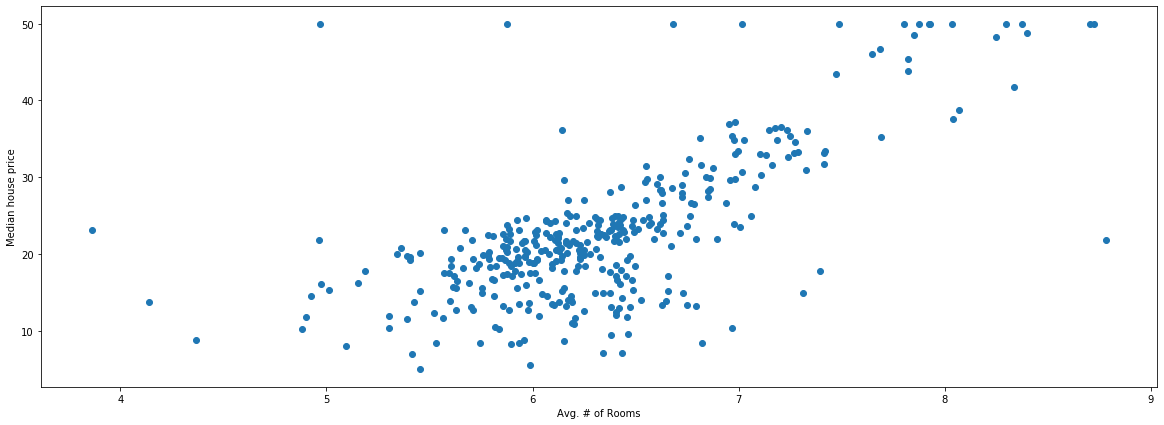

In [80]:
# It's always good to get intuition with a plot!
scatter(X_train['RM'], y_train)
xlabel("Avg. # of Rooms")
ylabel("Median house price")

We can see something that looks linear.  Let's try fitting and drawing the resulting line.

Text(0, 0.5, 'Median house price')

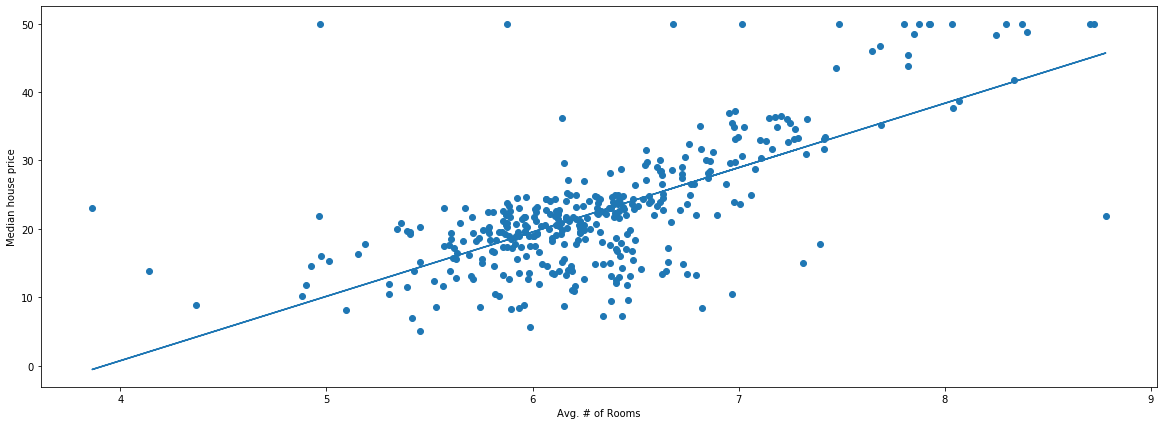

In [81]:
from sklearn.linear_model import LinearRegression

# Create the object
lr_rooms = LinearRegression()

# Fit X to y values
lr_rooms.fit(X_train[['RM']], y_train)

# Get model predictions
predictions = lr_rooms.predict(X_train[['RM']])

scatter(X_train['RM'], y_train)
plot(X_train['RM'], predictions)
xlabel("Avg. # of Rooms")
ylabel("Median house price")

Our model looks reasonably good, however it tends to underestimate price at the lower end (3 - 5 rooms on average) and at the upper end (7.5 - 9 rooms on average).  Let's quantify this by looking at the MSE.  

In [82]:
from sklearn.metrics import mean_squared_error

# Calculate the error between the true values and the predicted values
mse = mean_squared_error(y_train, predictions)

print("MSE: {}".format(mse))
print("We miss the target by {:.4}K on average".format(sqrt(mse)))

MSE: 44.15002858977413
We miss the target by 6.645K on average


However, this MSE value is for the *training* set.  We're interested in what happens with unseen data:

In [83]:
predictions = lr_rooms.predict(X_test[['RM']])
mse = mean_squared_error(y_test, predictions)

print("MSE: {}".format(mse))
print("We miss the target by {:.4}K on average".format(sqrt(mse)))

MSE: 42.5394398891114
We miss the target by 6.522K on average


### Trying other features

In [84]:
print("FEATURE\tMSE")
print("-------\t---")

for feature in ['AGE','DIS','CRIM']:
    lr = LinearRegression()
    lr.fit(X_train[[feature]], y_train)
    test_predictions = lr.predict(X_test[[feature]])
    mse = mean_squared_error(y_test, test_predictions)
    print("{}\t{:.5}".format(feature, mse))

FEATURE	MSE
-------	---
AGE	70.598
DIS	74.894
CRIM	64.037


So far we've been working with a single feature to predict the target.  What happens when we use more than one feature?

In [85]:
# Two features
lr_room_age = LinearRegression()
lr_room_age.fit(X_train[['RM','AGE']], y_train)
lr_room_age_test_predictions = lr_room_age.predict(X_test[['RM','AGE']].values)
mse = mean_squared_error(y_test, lr_room_age_test_predictions)
print("MSE: {:.5}".format(mse))

MSE: 41.434


In [86]:
# Three features
lr_room_age_dist = LinearRegression()
lr_room_age_dist.fit(X_train[['RM','AGE','DIS']], y_train)
lr_room_age_dist_test_predictions = lr_room_age_dist.predict(X_test[['RM','AGE','DIS']].values)
mse = mean_squared_error(y_test, lr_room_age_dist_test_predictions)
print("MSE: {:.5}".format(mse))

MSE: 40.41


In going from 2 to 3 features we get a better MSE score.  How can we tell how 'good' our fit is?  

We use a statistical measure called $R^2$ (pronounced R-squared)

In [87]:
from sklearn.metrics import r2_score

print("R2 for two features  : {:.5}".format(r2_score(lr_room_age_test_predictions, y_test)))
print("R2 for three features: {:.5}".format(r2_score(lr_room_age_dist_test_predictions, y_test)))

R2 for two features  : 0.28461
R2 for three features: 0.28235


As it turns out, the 3-feature model is actually not much better than a 2-feature model from a statistical point of view.  In practice, it delivers a lower MSE.  Which is better depends on the business problem.

Small note:  adding more parameters to a model will always decrease its MSE.  The reason is that the model is more complex and hence can accomodate the data better.  However, we must beware of *overfitting*, where we treat the noise as part of the model.

### Validating Results

Since we don't have a validation dataset, we're using our test set to check what features increase or $R^2$ and/or lower our MSE.  But in doing so we might be overfitting to the specific test set.  On the other hand, we don't have a lot of data so we need everything we can get for reasonably-sized train and test sets.  What to do?

The solution is called *k-fold cross validation*.  We split our data into $k$ parts (or *folds*).  We train on $k-1$ folds and test on the last remaining fold.  We repeat this procedure $k$ times - in other words, each fold gets the chance to be a 'test set' of sorts.  By doing this we ensure that we use all of the available data for both train and test.

In [89]:
from sklearn.model_selection import cross_val_score

def score_fold(trained_lr,X,y):
    predictions = trained_lr.predict(X)
    return mean_squared_error(y, predictions)

# Use default 5-fold CV
cross_val_score(LinearRegression(), df[['RM']], df['MEDV'], scoring=score_fold)

array([ 10.11581024,  33.25013827,  39.73491255, 106.6526283 ,
        73.84557039])

So a model with the single RM feature does not return similar MSE values for all folds.  So back to the drawing board... 

Once we find a good model we train it with *all* the data and deploy.

## Polynomial Regression 

As we saw above, the form of our relationship is linear:  $ \alpha + \beta_1 \cdot x_1 + \ldots + \beta_n \cdot x_n $.  Although each $\beta$ is a constant, there is no limitation on the $x$'s themselves.  So it's perfectly legal to have a *linear* relationship such as this: $$ \alpha + \beta_1 \cdot x + \beta_2 \cdot x^2 $$

This is known as *polynomial regression*.


/Users/yuvalm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Median house price')

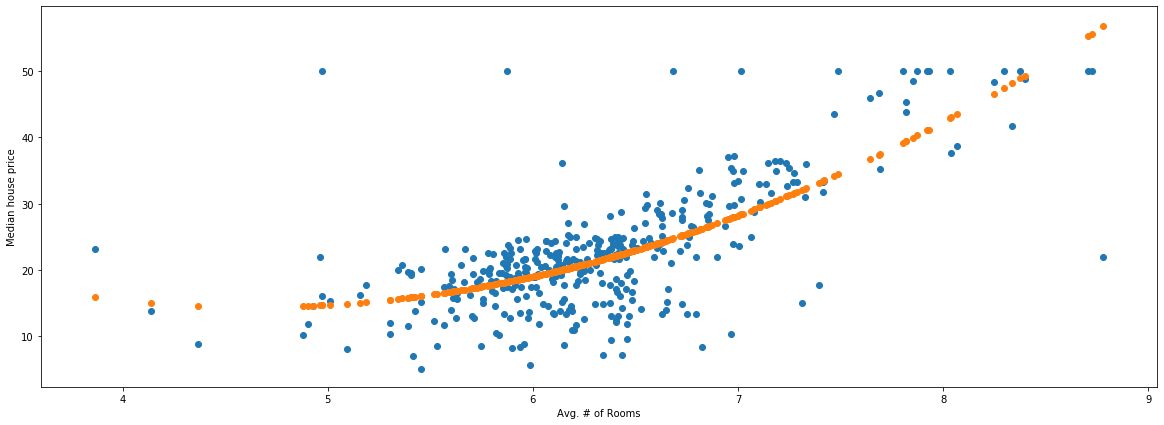

In [90]:
data = X_train[['RM']]
data['RM2'] = data['RM'] ** 2

lr_room_room2 = LinearRegression()
lr_room_room2.fit(data, y_train)
predictions = lr_room_room2.predict(data)

scatter(X_train['RM'], y_train)
scatter(X_train['RM'], predictions)
xlabel("Avg. # of Rooms")
ylabel("Median house price")

It would appear that using the squared number of rooms leads to a model that better captures the shape of the data.  Let's quantify this intuition.

In [91]:
test_data = X_test[['RM']]
test_data['RM2'] = test_data['RM'] ** 2

test_predictions = lr_room_room2.predict(test_data)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("MSE: {:.5}".format(test_mse))
print("R2: {:.5}".format(test_r2))

MSE: 34.363
R2: 0.57667


/Users/yuvalm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Intersting - it looks as if the *squared* average number of rooms in the house can significantly increase $R^2$ and lower MSE.  This is good news for the business - our predictive model makes smaller mistakes.  But now the question arises - can we understand the influence of both the regular and squared values on the target?

## Interpreting Linear Regression Coefficients
As it turns out, this is definitely possible.  In fact, the *coefficients* of the $x$'s (what we called $\beta_1, \beta_2$, etc.) are exactly what we need.  Each coefficient in a linear regression tells us buy how much the target changes when we increase the relevant variable by 1 unit and *keep all other variables constant*.  Let's see this in practice.

In [92]:
# Pull out the coefficients for x and x^2


lr_room_room2.coef_

array([-22.81211001,   2.46229347])

These numbers tell us that when we increase $x^2$ by 1, the target increases by a positive amount.  It also tells us that when we increase $x$ by 1, the target increases by a negative amount (i.e., decreases).  Say what???  How can increasing the number of average rooms in the house *reduce* the house price???  

The reason is that $x$ and $x^2$ are *correlated*.  In other words, increasing or decreasing one will increase or decrease the other one.  In linear regression, this means that they explain the same thing.  Normally, this is a problem.  Here, because our two variables are powers of each other, we can continue safely.  Because $x^2$ is bigger than $x$, we see that it does most of the *work* and is positive as we expect.  The regular $x$ makes sure we don't increase the target too much.

We'll now try to give our model some values and see these increases/decreases in practice.  Since we'll change $x$ without changing $x^2$ (or vice-versa) this is called a *counter-factual*, as we don't have real data for this case (nor will we ever).

In [94]:
one_one = lr_room_room2.predict([[1,1]])[0]
two_one = lr_room_room2.predict([[2,1]])[0]
one_two = lr_room_room2.predict([[1,2]])[0]

print("model(2,1) - model(1,1) = {:.5}, coef(x) = {:.5}".format(
    (two_one - one_one), lr_room_room2.coef_[0]))

print("model(1,2) - model(1,1) = {:.5}, coef(x^2) = {:.5}".format(
    (one_two - one_one), lr_room_room2.coef_[1]))

model(2,1) - model(1,1) = -22.812, coef(x) = -22.812
model(1,2) - model(1,1) = 2.4623, coef(x^2) = 2.4623


## Summary

In this notebook we introuced the *linear regression* algorithm for finding a best linear fit that minimizes the MSE between a data point and its prediction.  We further saw that a linear relationship can also apply to functions of the original variables - such as powers.  Finally, we took a short look at the interpretation of the coefficients of the fit.  In the process we also introduced the use of k-fold cross-validation to make sure that our models can generalize.  

Linear regression is one of the main workhorses of the data science world - it's practically everywhere.  Because it's so common, many innovations have been proposed that improve performance and accuracy or deal with different kinds of error distributions.  Regardless, you'll find the linear regression useful in practically everything you do.  

# Exercises

1.  Try to find the optimal combination of features on the Boston Housing dataset that minimizes MSE.  Does this minimal MSE also correspond to a maximal $R^2$?  

FYI: The maximum possible value of the $R^2$ metric is 1.  
2.  Repeat the analysis on the `diabetes` dataset which you can access using the `load_diabetes` function in sklearn.datasets.  

    a.  What is the minimum MSE/maximum $R^2$ you can reach?
    
    b.  What can you say about each feature?  Does it increase or decrease the progression of the disease?